# Aprendizado de máquina para Cancer de mama Diagnóstico

O Outubro Rosa é um movimento global de conscientização sobre o câncer de mama, e sua importância não pode ser subestimada. Ao longo deste mês, pessoas em todo o mundo se unem para aumentar a conscientização sobre a prevenção, diagnóstico e tratamento dessa doença que afeta milhões de mulheres. A campanha destaca a importância do autoexame e mamografias regulares, permitindo um diagnóstico precoce que pode salvar vidas. Além disso, o Outubro Rosa promove a solidariedade e o apoio às mulheres que enfrentam essa batalha, lembrando-nos de que juntos somos mais fortes na luta contra o câncer de mama. É um mês de educação, esperança e união em prol da saúde das mulheres.

O propósito deste estudo é desenvolver um modelo de previsão para distinguir entre exames médicos com resultados benignos e malignos. Esta aplicação tem o potencial de beneficiar a eficácia e a velocidade com que os médicos podem iniciar o tratamento em pacientes, aproveitando as vantagens da tecnologia. Os dados utilizados neste estudo foram obtidos de uma fonte pública disponível no Kaggle.com.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import graphviz

In [2]:
diag_data = pd.read_csv('cancer_mama_diagnostic.csv').drop('Unnamed: 32', axis=1)
diag_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
list(diag_data)

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

### Exploração dos dados

In [4]:
diag_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
diag_data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [6]:
diag_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### B = Benigno
### M = Maligno

In [7]:
# checando valores nulosdiag
diag_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Machine Learning

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [9]:
feactures = diag_data.drop(['diagnosis'], axis=1)
label = diag_data['diagnosis']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
feactures, label, test_size=0.4, random_state=42)

In [11]:
x_train.shape, x_test.shape

((341, 31), (228, 31))

## Classificando com critério de indice gini para minimizar a impureza dos nós da árvore

In [12]:
modelo = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
modelo.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [13]:
print('Precisão do treino', modelo.score(x_train, y_train))
print('Precisão do teste', modelo.score(x_test, y_test))

Precisão do treino 0.967741935483871
Precisão do teste 0.9385964912280702


## Fazendo a previsões do modelo

In [14]:
y_previsao_diag = modelo.predict(x_test)
y_previsao_diag

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B

## Visualizando árvore

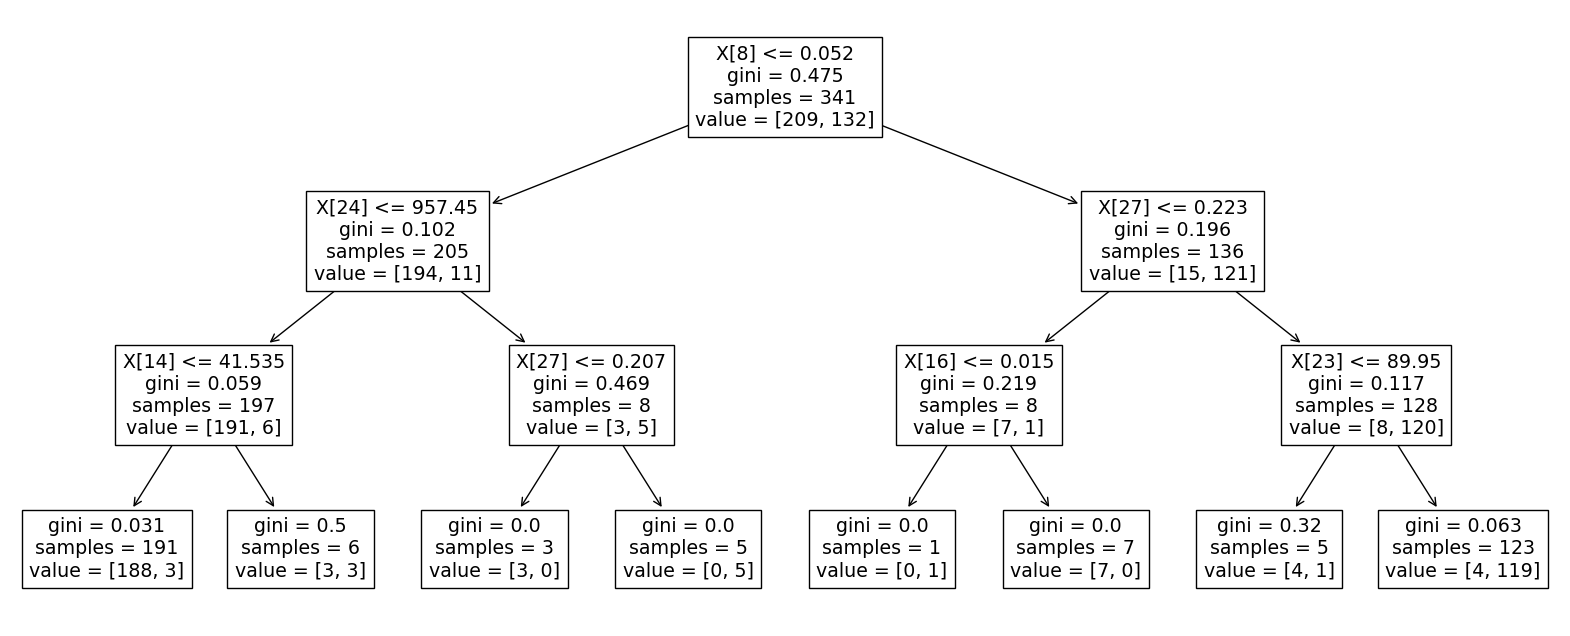

In [15]:
plt.figure(figsize=(20,8))
tree.plot_tree(modelo.fit(x_train, y_train))
plt.show()

## Classificando com critério de entropia

In [16]:
m_entropia =  DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
m_entropia.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [17]:
print('Precisão do treino', m_entropia.score(x_train, y_train))
print('Precisão do teste', m_entropia.score(x_test, y_test))

Precisão do treino 0.9765395894428153
Precisão do teste 0.9517543859649122


## Previsões com modelo critério entropia

In [18]:
y_e_previsao_diag = m_entropia.predict(x_test)
y_e_previsao_diag

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

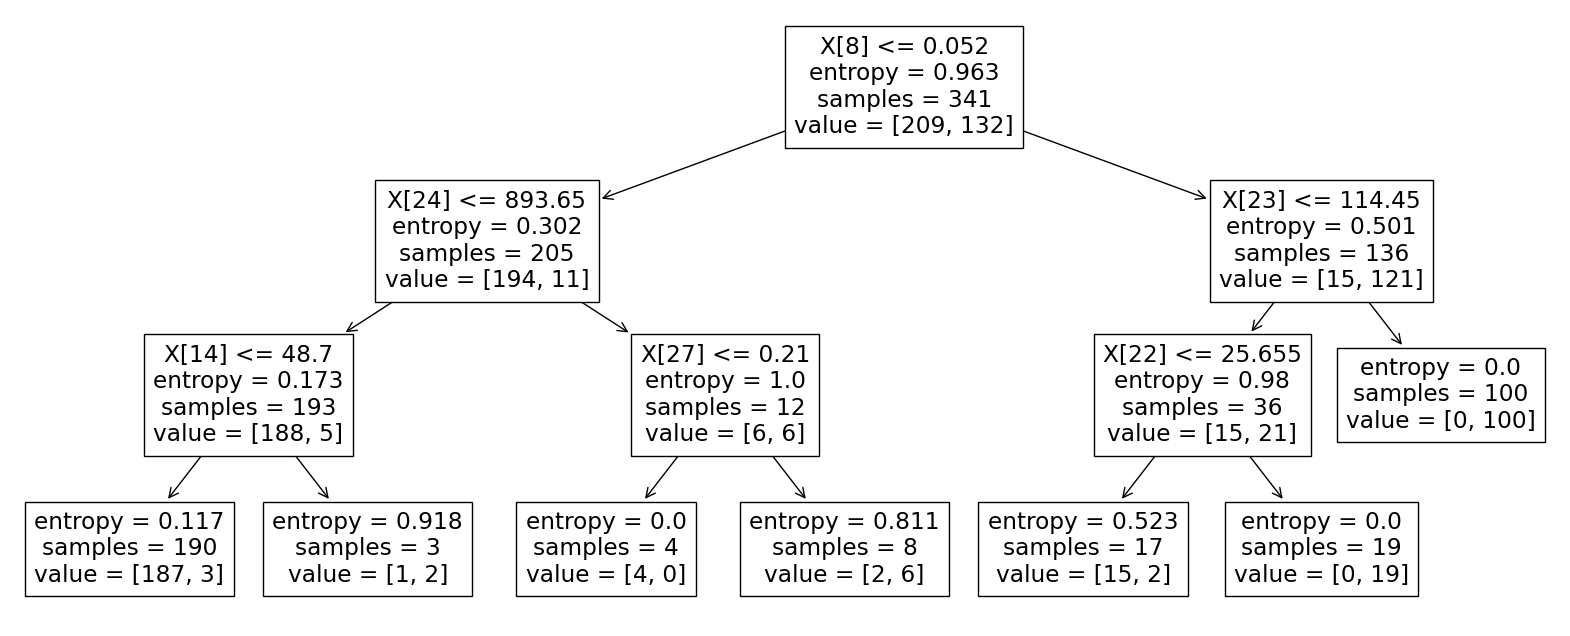

In [19]:
plt.figure(figsize=(20,8))
tree.plot_tree(m_entropia.fit(x_train, y_train))
plt.show()

## Matriz de confusão

In [20]:
matriz_confusao = confusion_matrix(y_test, y_e_previsao_diag)
matriz_confusao

array([[146,   2],
       [  9,  71]], dtype=int64)

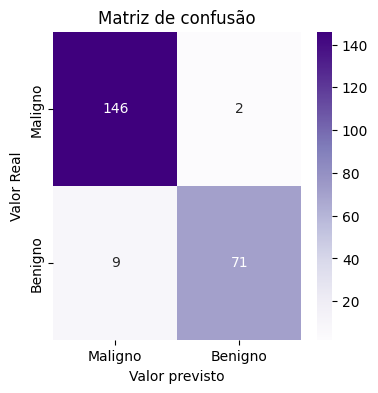

In [21]:
plt.figure(figsize=(4, 4))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Purples', xticklabels=['Maligno', 'Benigno'], 
            yticklabels=['Maligno', 'Benigno'])
plt.title('Matriz de confusão')
plt.xlabel('Valor previsto')
plt.ylabel('Valor Real')
plt.show()

- 1 - O modelo previu 146 vezes Maligno corretamente
- 2- O modelo previu 71 vezes benigno corretamente
- 3  - O modelo previu 2 vezes maligno incorretamente
- 4 - O modelo previu 9 vezes benigno incorretamente

## Previsão com Radom forest

In [22]:
m_forest = RandomForestClassifier(n_estimators=1000)
m_forest.fit(x_train, y_train)
forest_predict = m_forest.predict(x_test)

In [23]:
print('Precisão do treino', m_forest.score(x_train, y_train))
print('Precisão do teste', m_forest.score(x_test, y_test))

Precisão do treino 1.0
Precisão do teste 0.9692982456140351


In [24]:
forest_predict

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

## Matriz de confusão para Random Forest

In [25]:
m_confusao_forest = confusion_matrix(y_test, forest_predict)
m_confusao_forest

array([[146,   2],
       [  5,  75]], dtype=int64)

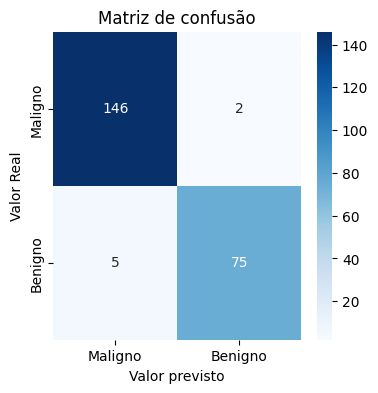

In [26]:
plt.figure(figsize=(4, 4))
sns.heatmap(m_confusao_forest, annot=True, fmt='d', cmap='Blues', xticklabels=['Maligno', 'Benigno'], 
            yticklabels=['Maligno', 'Benigno'])
plt.title('Matriz de confusão')
plt.xlabel('Valor previsto')
plt.ylabel('Valor Real')
plt.show()

- 1 - O modelo previu 145 vezes Maligno corretamente
- 2- O modelo previu 75 vezes benigno corretamente
- 3  - O modelo previu 3 vezes maligno incorretamente
- 4 - O modelo previu 5 vezes benigno incorretamente

#### O modelo com Ramdom forest errou menos e ficou mais adquado.

## Conclusão

Os modelos apresentaram um desempenho notável, alcançando uma eficácia consistente de mais de 90% tanto nos conjuntos de treinamento quanto nos conjuntos de teste. Após conduzir algumas análises adicionais e realizar testes adicionais, podemos concluir com confiança que o modelo está pronto para ser implantado em um ambiente de produção sem preocupações significativas.